In [100]:
# an extra line to display the results in Ipython notebook, remove before sharing the tutorial.
%matplotlib inline

# Introduction to Simulation: Complex social dynamics in a few lines of code

We will create a model depicting competition between two cultural traits within a common population. This is a typical cultural dynamic where individuals must adopt one option amongst two or more mutually exclusive options (i.e. religion, elections, football teams, ...). In this case we are interested in situations when you have to choose one option (e.g., you cannot have two religions), but more complex versions with individuals adopting more than one trait can easily be developed.

Individuals can change their choice over time. The decision is based on the payoff of each trait. This payoff is a measure of the relative interest of the trait, based on: 

a) how many people exhibits it and 

b) an internal attractiveness of the trait.

An example of this dynamic could be a competition between two different religions. The number of people practicing a belief makes this belief more appealing. However, some beliefs could be intrinsically more interesting for some individuals so part of the population could adopt them even if they are a minority. Finally, social norms are not static so the attractiveness of specific beliefs can vary over time.


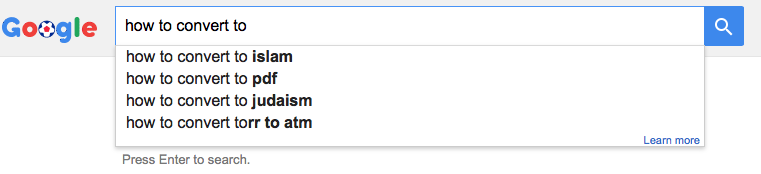

In [101]:
from IPython.display import Image
Image(filename='/Users/iar1g09/Desktop/convert.png')

Time is divided in discrete steps starting at t = 0. 

At each step t the two populations $A_t$ and $B_t$ are updated as individuals move from A to B and from B to A.

\begin{equation*}
A_{t+1} = A_t + C_{B\to A}
\end{equation*} 
\begin{equation*}
B_{t+1} = B_t + C_{A\to B}
\end{equation*}   

Let's see how we can expess it in code. 

We start with an auxilary line of code which prevents truncation when dividing integers. You don't have to worry about it now but just keep in mind to start any code written in Python 2.7 or earlier with this line.   

In [102]:
from __future__ import division

First, we need to define the number of individuals in the population. Say we want to start with 100 people:

In [103]:
N = 100   # total population size

Then, we decide on how many believers of each religion we want to start with. 

In [160]:
A = 30    # initial number of believers A
B = N - A

Finally, we want to update these quantities at every time step:

In [161]:
t = 0
MAX_TIME = 10
while t < MAX_TIME:
    A = A + changeBA
    B = B + changeAB
    t += 1

Type the code in the code tab. Keep in mind that indents are important. The text after a hash is just a comment so you can skip it for now, but in general it is a good idea to keep documenting the code as you write it. 

So what happens when you run the code?

Well, nothing happens. This is because the computer executed all the commands but we didn't ask it to output anything. If you add the following line at the end of the code (after t+=1) 

it should print out a list of numbers from 1 to 10.

In [162]:
t = 0
MAX_TIME = 10
while t < MAX_TIME:
    A = A + changeBA
    B = B + changeAB
    t += 1
    print t # check if the code works

1
2
3
4
5
6
7
8
9
10


The key element now is to calculate the change from from the pool of believers A to the pool of believers B. 
As we mentioned is defined by the number of adopters of the other trait as well as its internal attractiveness. Type this code at the end of the while loop (remember to indent it to the same level as the previus lines). 

In [163]:
    # calculate the change between believers A and B in the current time step       
    changeBA =  transmission(A, Ta, Tb) * B       
    changeAB =  transmission(B, Tb, Ta) * A   

The first term is defined as the proportion of entire population N with this trait ($\frac {A_t}{N}$ for $A_t$ and $\frac {B_t}{N}$ for $B_t$). The last element is the balance between the attractiveness of both ideas ($T_A$ and $T_B$). To compute this value we divide the attractiveness of the competing trait by the difference between both of them. So we need to implement the following competition equations:

\begin{equation*}
C_{B\to A} = \frac{A_t}{N}\ \frac {(T_A - T_B)} {(T_B + T_A)}\
\end{equation*} 


\begin{equation*}
C_{A\to B} = \frac{B_t}{N}\ \frac {(T_B - T_A)} {(T_A + T_B)}\
\end{equation*} 

You have probably immediately noticed that these two equations are the same in structure and only differ in terms of what is put into them. Therefore, to avoid unnecessary hassle we will create a 'universal' function that can be used for both. Type the code below somewhere at the end of your script.

In [164]:
def transmission(no_believers, Tx,Ty):

    no_adopters = (no_believers / N) 
    attraction = (Tx - Ty) / (Ty + Tx)
    return no_adopters * attraction

Let's break it down a little. First we define the function and give it the input - the number of believers and the two values that define how attractive each cultural option is. 
~~~python 
def transmission(no_believers, Tx, Ty):
~~~
Then we calculate two values 
1. number of people who belong to the option  
~~~python 
no_adopters = (believers / N) 
~~~
2. how attractive this option is
~~~python 
attraction = (Tx - Ty) / (Ty + Tx)
~~~ 

Look at the equations above, the first element is just the $\frac {A_t}{N}$ and $\frac {B_t}{N}$ part and the second is this bit: $\frac {(T_A - T_B)} {(T_B + T_A)}$. 
Finally we return the results of the calculations. 
~~~python 
return no_adopters * attraction
~~~ 
Voila! We have implemented the equation into Python code. Now, look at the code where we call the function - we need to do it twice but each time we can pass different values into it. So to get the change from B to A we use 
~~~python 
changeBA = transmission(A, Ta, Tb) * B       
~~~ 
That is, we pass the number of believers A and the attractiveness of the trait A first. To get the change from A to be we do not need to build another function. Instead wejust pass the values into the same function (the number of believers B and the attractiveness of the trait B).  

We can use an additional term to have a control over how strong the transmission from AB and back is - we will call it alpha (α). Add the alpha term to the previous set of equations. 

In [165]:
    # calculate the change between believers A and B in the current time step       
    changeBA = alpha * transmission(A, Ta, Tb) * B       
    changeAB = alpha * transmission(B, Tb, Ta) * A  

The obvious problem now is that we have not defined the alpha or the 'attractiveness' of each trait. To do so add their definitions at the beginning of the script around other definitions (N, A, B, MAX_TIME, etc). 

In [166]:
Ta = 1.0            # initial attractiveness of option A
Tb = 1.1            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

OK, we have all the elements ready now and the computer is churning numbers somewhere in the bacground. However, it produces no output so we have no idea what is actually happen. Let's visualise the process. 
First, we will create two empty lists. Then, at each timestep, we will add the current number of believers to these lists and finally, at the end of the simulation run we will plot them to see how they changed over time. 
Start with creating two empty lists. Add the following code, creating two empty lists, right after all the variable definitions at the beginning of the code before the while loop: 

In [167]:
believersA = []    
believersB = []

The whole initialisation/definition block at the beginning of your code should look like this: 

In [203]:
from __future__ import division

# initialisation 
MAX_TIME = 10
t = 0               # initial time
N = 100.0           # population size
A = 50              # initial proportion of believers A
B = N-A             # initial proportion of believers B

Ta = 1.0            # initial attractiveness of option A
Tb = 1.1            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

believersA = []    # the first value is equal to the initialisation value (defined above)
believersB = []

Let's now add the numbers of believers to their respective lists. Add the following code at the end of the while loop - remember to align the indents with the previous line! 

In [204]:
    believersA.append(A)
    believersB.append(B)

The whole while-loop block should now look like this: 

In [205]:
while t < MAX_TIME: 
    
    # calculate the change between believers A and B in the current time step       
    changeBA = alpha * transmission(A, Ta, Tb) * B       
    changeAB = alpha * transmission(B, Tb, Ta) * A    

    # update the population    
    A = A + changeBA 
    B = B + changeAB

    # save the values to a list for plotting    
    believersA.append(A)
    believersB.append(B)
        
    # time = time + 1        
    t+=1 

Finally, let's plot the results. First, we will import Python's plotting library, Matplotlib and use a predifined plotting style. Add these two lines at the beginning of your script, just after this line:
~~~python 
from __future__ import division
~~~

In [206]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

Finally, let's plot! Plotting in Python is as easy as saying 'please plot this data for me'. Type these two lines at the very end of your code. We only want to plot the results once the simulation has finished so make sure this are not inside the while loop - to do so, ensure this block of code is not indented. Run the code!

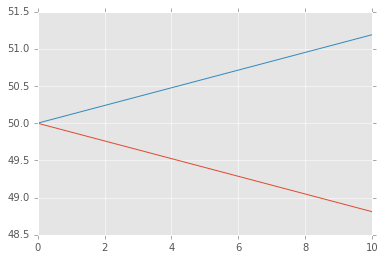

In [207]:
# plot the results    
plt.plot(believersA)
plt.plot(believersB) 

You can see how over time one set of believers increases while the other decreases. Have a go at setting the variables to different initial values:
1. set the initial value of A to 50,
2. set the MAX_TIME to 1000,
3. set the Ta and Tb to 1.0, 1.1, 0.9, 0.01, etc.,
4. set the Ta to 1.01 and A to 10,
5. set alpha to 0.01, 0.1, 1.0 and 10.00. 

You can try all sorts of configurations to see how quickly the population shifts from one option to another. We can make the model more interesting though if allow the attractiveness to change throughout the model. To do so let's define a new function. Add the following line at the beginning of the while loop (remember indentation!). 

In [209]:
    Ta_now, Tb_now = attractiveness(Ta, Tb) 

And let's define the 'attractiveness' function. We have already done it once for the the 'transmission' function so it should be a piece of cake. At each time step we will slightly modify the attractiveness of each trait using a stochastic kernel K. This can be expressed as: 

\begin{equation*}
T_{A, t+1} = {T_A} + {K_a}
\end{equation*} 

\begin{equation*}
T_{B, t+1} = {T_B} + {K_b}
\end{equation*} 

K can have several shapes such as:
* Fixed traits with $K_a$ = $K_b$ = 0
* Gaussian process with K = N (0, 1)
* A combination (e.g., $K_a$ = N (0, 1) and $K_b$ = t/3)

We start with the fixed case scenario, i.e., $K_a$ and $K_b$ are both equal to zero. 
Add the following function to the end of your script.

In [5]:
def attractiveness(Ta, Tb):

    Ka = 0  
    Kb = 0
    
    Ta = Ta + Ka
    Tb = Tb + Kb
    return Ta, Tb

First, we define the function and give it the input values. 
~~~python 
def attractiveness(Ta, Tb):
~~~

Then, we establish how much the attractiveness of each trait changes (i.e., calculate $K_a$ and $K_b$)
~~~python 
Ka = 0         
Kb = 0
~~~

And plug them into the equations:

~~~python 
Ta = Ta + Ka
Tb = Tb + Kb
~~~

Finally, we return the new values:
~~~python 
return Ta, Tb
~~~
Have a go at changing the values of $K_a$ and $K_b$ and see what happens. 